## Using Natural Language Processing Techniques to Understand Corporate Sustainability Issues
### NLP Project Minimum Viable Product

by Jenica Andersen

May 27, 2022

As described in the project proposal, a minimum viable product for this project should be 1.) a successfully scraped corpus of documents and 2.) a plot of sentiment scores across documents in the corpus.


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vesper/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1. The following is a subset of the entire corpus of documents.

This document shows the size of the corpus I have acquired. There are about 94,000 words coming from about 226 documents, averaging 415 words each. Ceres.org has about 2,865 documents available. I will attempt to obtain the rest (or as much of it as possible) in the coming days. 

In [80]:
df = pd.read_csv(r'/Users/vesper/Documents/Metis/Module_5_Unsupervised_NLP/Sustainability_Project/shareholder_resolutions_ceres.csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        1001 non-null   object
 1   title         1001 non-null   object
 2   organization  1001 non-null   object
 3   filed_by      999 non-null    object
 4   year          1001 non-null   int64 
 5   whereas       504 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [82]:
df.dropna(subset = ['whereas'],inplace = True)
df.head()

,status,title,organization,filed_by,year,whereas
0,Filed,Adopt stewardship practices to reduce diversif...,3M Co.,The Shareholder Commons,2022,"In our Company’s 2021 Sustainability Report, C..."
1,Vote,Report on lobbying,Abbott Laboratories,Unitarian Universalist Association,2022,We believe in full disclosure of Abbott Labora...
2,Vote,Report on lobbying in line with company values...,AbbVie Inc.,As You Sow,2022,The political expenditures of AbbVie Inc. appe...
3,Withdrawn: Commitment,Adopt GHG reduction targets,Air Products & Chemicals Inc.,The Nathan Cummings Foundation,2022,Resolved:\nShareholders request Air Products a...
4,Withdrawn: Strategic,Adopt GHG reduction targets,Allegheny Technologies Inc.,As You Sow,2022,The increasing rate and number of climate rela...


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 520
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        504 non-null    object
 1   title         504 non-null    object
 2   organization  504 non-null    object
 3   filed_by      502 non-null    object
 4   year          504 non-null    int64 
 5   whereas       504 non-null    object
dtypes: int64(1), object(5)
memory usage: 27.6+ KB


In [84]:
word_count = df["whereas"].apply(lambda x: len(str(x).split(' ')))
word_count.sum()

221373

### 2. The following includes a plot of sentiment scores across documents in the corpus
Across entire corpus subset, the sentiment scores were: 
- negative: 0.073
- neutral: 0.803
- positive: 0.124
- and compound: 1.0

The compound score of 1.0 is as positive as a document can be (and is suspiceous to me). This deserves further investigation. 


In [86]:
corpus = list(df.whereas)
corpus

['In our Company’s 2021 Sustainability Report, CEO Mike Roman states, “We are committed to being leaders in sustainability.”1 A review of that report reveals our Company has addressed many environmental concerns. But 3M’s commitment is limited. For example:\n3M is active in three trade associations that work against comprehensive U.S. policies to address climate change.2\n3M does not appear to have committed to meet the Science-Based Targets initiative for a 1.5- degree Celsius world3 and failed to receive an “A” grade in 2020 from CDP, a widely used and respected climate rating.4\nBelgian regulators recently ordered 3M to stop PFAS production after recent blood samples taken from 800 people near 3M’s plant showed elevated levels of PFAS.5\nIt appears our Company only addresses sustainability issues when that pursuit optimizes 3M’s financial return. The Sustainability Report states:\nOur priority is the comprehensive management of enterprise risks through an ethical tone, governance pr

In [87]:
corpus_join = ' '.join(df['whereas'])

In [88]:
analyzer = SentimentIntensityAnalyzer() 
score = analyzer.polarity_scores(corpus)
print(score)

{'neg': 0.073, 'neu': 0.798, 'pos': 0.129, 'compound': 1.0}


In [75]:
#checking to see if sentiment changes when 1 large string is analyzed vs the list of document strings. 
#it looks like the answer is no. 
analyzer = SentimentIntensityAnalyzer() 
score = analyzer.polarity_scores(corpus_join)
print(score)

{'neg': 0.072, 'neu': 0.802, 'pos': 0.125, 'compound': 1.0}


In [25]:
score = analyzer.polarity_scores(corpus[0])
print(score)

{'neg': 0.107, 'neu': 0.746, 'pos': 0.147, 'compound': 0.9697}


In [89]:
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['whereas']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['whereas']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['whereas']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['whereas']]
df

,status,title,organization,filed_by,year,whereas,count,compound,neg,neu,pos
0,Filed,Adopt stewardship practices to reduce diversif...,3M Co.,The Shareholder Commons,2022,"In our Company’s 2021 Sustainability Report, C...",1,0.9697,0.107,0.746,0.147
1,Vote,Report on lobbying,Abbott Laboratories,Unitarian Universalist Association,2022,We believe in full disclosure of Abbott Labora...,2,0.5205,0.115,0.780,0.105
2,Vote,Report on lobbying in line with company values...,AbbVie Inc.,As You Sow,2022,The political expenditures of AbbVie Inc. appe...,3,0.9956,0.031,0.801,0.168
3,Withdrawn: Commitment,Adopt GHG reduction targets,Air Products & Chemicals Inc.,The Nathan Cummings Foundation,2022,Resolved:\nShareholders request Air Products a...,4,0.9545,0.013,0.830,0.156
4,Withdrawn: Strategic,Adopt GHG reduction targets,Allegheny Technologies Inc.,As You Sow,2022,The increasing rate and number of climate rela...,5,0.2960,0.054,0.883,0.064
...,...,...,...,...,...,...,...,...,...,...,...
516,Vote,Report on sexual harassment policies,Wal-Mart Stores Inc.,Not Disclosed in Proxy,2020,"This past year, workplace sexual harassment ha...",517,-0.9956,0.165,0.776,0.060
517,Vote,Report on lobbying,Walt Disney Co.,Congregation of Sisters of St. Agnes,2020,We believe in full disclosure of Disney's dire...,518,0.7439,0.077,0.851,0.072
518,Withdrawn: Commitment,Report on plastic pollution,"Waste Management, Inc.",Trillium Asset Management,2020,Plastic pollution has become a critical and ur...,519,-0.4667,0.092,0.812,0.096
519,Vote,Report on pay disparity,Wells Fargo,Harold B. Bamburg Revocable Trust,2020,The World Economic Forum estimates the gender ...,520,0.9249,0.059,0.805,0.135


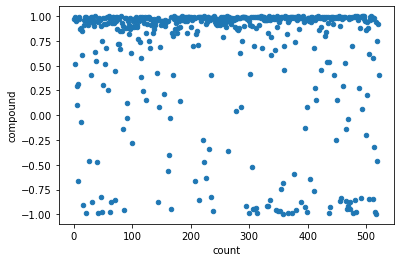

In [90]:
df['count'] = df.index+1
plt = df.plot(x ='count', y='compound', kind = 'scatter')

*Figure 1:* Sentiment scores for all documents in corpus subset. Recall a compound score ranges from -1(very negative) to 1(very positive). Most documents have a very positive 

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#the following is from geeks for geeks  
stop_words = set(stopwords.words('english'))
  
word_tokens = word_tokenize(corpus[0])
  
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['In', 'our', 'Company', '’', 's', '2021', 'Sustainability', 'Report', ',', 'CEO', 'Mike', 'Roman', 'states', ',', '“', 'We', 'are', 'committed', 'to', 'being', 'leaders', 'in', 'sustainability.', '”', '1', 'A', 'review', 'of', 'that', 'report', 'reveals', 'our', 'Company', 'has', 'addressed', 'many', 'environmental', 'concerns', '.', 'But', '3M', '’', 's', 'commitment', 'is', 'limited', '.', 'For', 'example', ':', '3M', 'is', 'active', 'in', 'three', 'trade', 'associations', 'that', 'work', 'against', 'comprehensive', 'U.S.', 'policies', 'to', 'address', 'climate', 'change.2', '3M', 'does', 'not', 'appear', 'to', 'have', 'committed', 'to', 'meet', 'the', 'Science-Based', 'Targets', 'initiative', 'for', 'a', '1.5-', 'degree', 'Celsius', 'world3', 'and', 'failed', 'to', 'receive', 'an', '“', 'A', '”', 'grade', 'in', '2020', 'from', 'CDP', ',', 'a', 'widely', 'used', 'and', 'respected', 'climate', 'rating.4', 'Belgian', 'regulators', 'recently', 'ordered', '3M', 'to', 'stop', 'PFAS', 'pr

#### **Next steps are to gather more of the data, further clean the data, remove urls, stop words, punctuation etc and see how the sentiment scores measure. Then begin topic modeling.** 